In [1]:
import matplotlib.pyplot as plt # for plotting and creating figures
import numpy as np # for easy and fast number calculation
from math import tau
from matplotlib import animation, rc

import draw_circle_fourier
from draw_circle_fourier import ImageReader
from draw_circle_fourier import Fourier
from draw_circle_fourier import DrawAnimation

/Users/coco/opt/anaconda3/lib/python3.8/site-packages/PIL/Image.py:951: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(
/Users/coco/Desktop/PACKAGE/draw_circle_fourier/ImageReader/Image.py:26: UserWarning: No contour levels were found within the data range.
  contour_plot = plt.contour(self.im,levels = level,origin='image')
[0.00000000e+00 1.68450008e-03 3.36900016e-03 ... 6.27981631e+00
 6.28150081e+00 6.28318531e+00] [-5. -4. -3. ... -7. -6. -5.] [253. 253. 253. ... 252. 252. 253.]


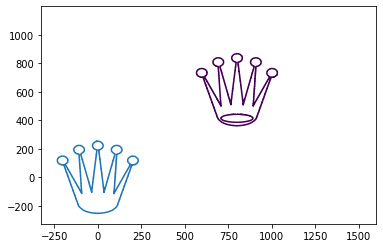

In [7]:
# Part Kenjy

image = ImageReader("https://www.eaca-inspire.eu/wp-content/uploads/2017/09/Rolex-logo.png")
time_table, x_table, y_table = image.get_tour()
print(time_table, x_table, y_table)

In [8]:
#Part COCO

order = 100

cf = Fourier(time_table, x_table, y_table,order)
fouriercoeff = cf.coef_list(time_table, x_table, y_table, order)

print(fouriercoeff)

[[ 7.33865509e-03 -1.48376347e-02]
 [ 3.00078241e-02 -1.21521635e-02]
 [ 1.00107726e-01 -4.98210910e-02]
 [ 5.07405589e-02 -1.74820598e-02]
 [ 5.09925921e-02 -2.88096005e-02]
 [-3.89920524e-02 -5.01130918e-03]
 [-6.00198206e-02  3.66307060e-02]
 [ 2.49853504e-02 -1.79946171e-02]
 [-5.02279079e-02  2.10811739e-02]
 [-5.24234419e-02  8.48005984e-03]
 [ 4.32470553e-02 -7.11063222e-03]
 [ 9.16879437e-02 -2.06900272e-02]
 [ 1.36701036e-02 -8.91033533e-03]
 [-1.47463045e-01  6.03917579e-02]
 [ 3.55366304e-02 -5.37965731e-03]
 [-1.64121399e-03  1.19415975e-02]
 [-1.24765148e-01  8.58508897e-02]
 [-9.36728784e-04  9.26249373e-03]
 [-1.42536317e-01  8.84874413e-02]
 [-1.57487811e-01  8.95054161e-02]
 [ 1.30558249e-01 -6.71428931e-02]
 [ 5.08917073e-02 -5.55364435e-03]
 [ 2.14378009e-02 -3.03987815e-02]
 [-9.75013570e-02  6.78822125e-02]
 [-6.90583455e-02  5.99101118e-02]
 [ 3.14652790e-02 -1.27666665e-03]
 [-1.16196813e-01  8.63172044e-02]
 [-9.20979558e-02  5.75953259e-02]
 [ 5.21916994e-02 -1

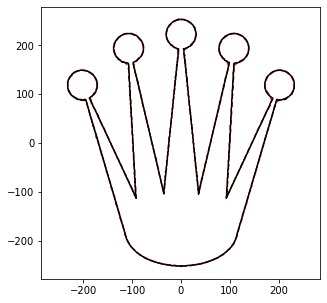

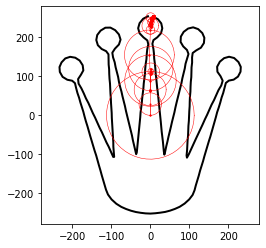

In [9]:
#Part Paul+Pierre

space = np.linspace(0,tau,300)
x_DFT = [cf.DFT(t, fouriercoeff, order)[0] for t in space]
y_DFT = [cf.DFT(t, fouriercoeff, order)[1] for t in space]

fig, ax = plt.subplots(figsize=(5, 5))
ax.plot(x_DFT, y_DFT, 'r--')
ax.plot(x_table, y_table, 'k-')
ax.set_aspect('equal', 'datalim')
xmin, xmax = plt.xlim()
ymin, ymax = plt.ylim()

b = DrawAnimation(x_DFT, y_DFT, fouriercoeff, order, space, [xmin, xmax, ymin, ymax])
anim = b.visualize(x_DFT, y_DFT, fouriercoeff, order, space, [xmin, xmax, ymin, ymax])

#Change based on what writer you have
#HTML(anim.to_html5_video())
#anim.save('pi.mp4',writer='ffmpeg')
anim.save('Rolex.gif',writer='pillow') #To save as gif 

In [10]:
from IPython.display import HTML
HTML(anim.to_jshtml())